1. Data Cleaning

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
import datetime

# Load your dataset
data = pd.read_csv(r"D:\IBM data science\final project\train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5953,NCG18,15.30,Low Fat,0.000000,Household,103.5332,OUT035,2004,Small,Tier 2,Supermarket Type1,3383.5956
1217,FDF57,14.50,Regular,0.058827,Fruits and Vegetables,172.2448,OUT046,1997,Small,Tier 1,Supermarket Type1,2897.5616
981,FDP48,NaN,Regular,0.043810,Baking Goods,181.3950,OUT027,1985,Medium,Tier 3,Supermarket Type3,6042.1350
961,FDZ56,16.25,Low Fat,0.025716,Fruits and Vegetables,168.1474,OUT013,1987,High,Tier 3,Supermarket Type1,1516.0266
4494,FDZ16,NaN,Regular,0.159082,Frozen Foods,193.5478,OUT027,1985,Medium,Tier 3,Supermarket Type3,4649.9472


In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Checking the dataset if it has duplicated values

In [7]:
data.duplicated().sum()

0

Great no duplicated values

In [8]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Missing Values: Item_Weight and Outlet_Size have missing values. We'll need to address these during data cleaning.

Data Types: There's a mix of numeric (float64, int64) and categorical (object) data. We'll need to handle these correctly, especially for model training.

Entries: 8523 rows in total—ample data for analysis and forecasting.

In [9]:
# Fill missing values for 'Item_Weight' with mean
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())

# Fill missing values for 'Outlet_Size' with mode
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

 #Verify changes
print(data.isnull().sum())


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


dealing with outliers

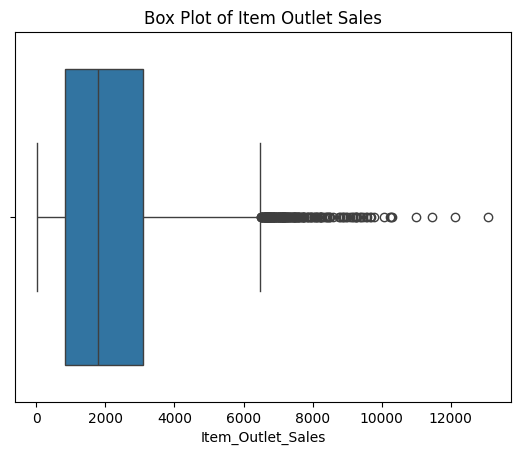

In [10]:
sns.boxplot(data=data, x='Item_Outlet_Sales')
plt.title('Box Plot of Item Outlet Sales')
plt.show()

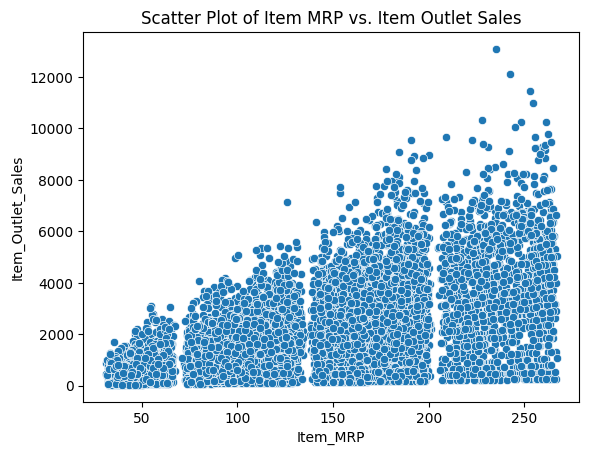

In [11]:
sns.scatterplot(data=data, x='Item_MRP', y='Item_Outlet_Sales')
plt.title('Scatter Plot of Item MRP vs. Item Outlet Sales')
plt.show()

In [12]:
Q1 = data['Item_Outlet_Sales'].quantile(0.25)
Q3 = data['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
cleaned_data = data[(data['Item_Outlet_Sales'] >= lower_bound) & (data['Item_Outlet_Sales'] <= upper_bound)]

# Describe cleaned data
cleaned_data.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8337.000000,8337.000000,8337.000000,8337.000000,8337.000000
mean,12.856638,0.066358,139.161087,1997.968094,2059.362844
std,4.250410,0.051838,61.553351,8.309941,1506.099754
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027028,93.046200,1987.000000,810.944400
50%,12.857645,0.053939,141.215400,1999.000000,1747.059200
75%,16.100000,0.095299,183.695000,2004.000000,2998.097400
max,21.350000,0.328391,266.888400,2009.000000,6478.234000


In [13]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8337 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8337 non-null   object 
 1   Item_Weight                8337 non-null   float64
 2   Item_Fat_Content           8337 non-null   object 
 3   Item_Visibility            8337 non-null   float64
 4   Item_Type                  8337 non-null   object 
 5   Item_MRP                   8337 non-null   float64
 6   Outlet_Identifier          8337 non-null   object 
 7   Outlet_Establishment_Year  8337 non-null   int64  
 8   Outlet_Size                8337 non-null   object 
 9   Outlet_Location_Type       8337 non-null   object 
 10  Outlet_Type                8337 non-null   object 
 11  Item_Outlet_Sales          8337 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 846.7+ KB


check for unique values

In [14]:
cleaned_data.apply(lambda x : len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7715
Item_Type                      16
Item_MRP                     5832
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3322
dtype: int64

In [15]:
print(cleaned_data['Item_Fat_Content'].value_counts(),'\n')

Item_Fat_Content
Low Fat    4971
Regular    2827
LF          313
reg         116
low fat     110
Name: count, dtype: int64 



After seeing the unique value counts from the `Item_Fat_Content` column, there have been some mistyping happened like the same categories were typed under different names. For further processing, all the mistypings are corrected and named under a single category. Checking out for the value counts of `Item_Fat_Content` column**_we notice that (Low Fat=LF=low fat) and (Regular=reg)

In [16]:
cleaned_data['Item_Fat_Content'] = cleaned_data['Item_Fat_Content'].replace({'LF' : 'Low Fat', 'low fat' : 'Low Fat', 'reg' : 'Regular'})
cleaned_data['Item_Fat_Content'].value_counts()

C:\Users\MARK8\AppData\Local\Temp\ipykernel_16024\2787371134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Item_Fat_Content'] = cleaned_data['Item_Fat_Content'].replace({'LF' : 'Low Fat', 'low fat' : 'Low Fat', 'reg' : 'Regular'})


Item_Fat_Content
Low Fat    5394
Regular    2943
Name: count, dtype: int64

so we solve this problem

In [17]:
cleaned_data['Item_Type'].value_counts(),'\n'

(Item_Type
 Fruits and Vegetables    1199
 Snack Foods              1173
 Household                 890
 Frozen Foods              841
 Dairy                     661
 Baking Goods              639
 Canned                    637
 Health and Hygiene        511
 Soft Drinks               434
 Meat                      416
 Breads                    245
 Hard Drinks               210
 Others                    169
 Starchy Foods             144
 Breakfast                 105
 Seafood                    63
 Name: count, dtype: int64,
 '\n')

no problem with this column 
most repeated values Fruits and Vegetables and Snack Foods 
least repeated values Seafood

In [18]:
cleaned_data['Outlet_Size'].value_counts(),'\n'

(Outlet_Size
 Medium    5058
 Small     2362
 High       917
 Name: count, dtype: int64,
 '\n')

no problem 
we notice that medium size have the most value and the high size have the least

In [19]:
cleaned_data['Outlet_Location_Type'].value_counts(),'\n'

(Outlet_Location_Type
 Tier 3    3229
 Tier 2    2741
 Tier 1    2367
 Name: count, dtype: int64,
 '\n')

no problem 
we notice that tier 3 have the most value and the tier 1 have the least

In [20]:
cleaned_data['Item_Identifier'].value_counts(),'\n'

(Item_Identifier
 FDG33    10
 FDW13    10
 FDX04     9
 FDW49     9
 FDW26     9
          ..
 FDE52     1
 FDQ60     1
 FDK57     1
 FDN52     1
 DRG25     1
 Name: count, Length: 1559, dtype: int64,
 '\n')

In [21]:
# Initialize an empty set
Item_Identifier_unique = set()

# Loop through value counts and add to the set
for x in cleaned_data['Item_Identifier'].value_counts().index:
    Item_Identifier_unique.add(x)

# Convert the set to a tuple if you need an immutable collection
Item_Identifier_unique = tuple(Item_Identifier_unique)
# Display thItem_Identifier_unique result
print(Item_Identifier_unique)

('FDT46', 'FDC35', 'FDX28', 'NCO29', 'FDE08', 'NCR18', 'FDS59', 'NCH07', 'NCJ05', 'FDA22', 'NCN43', 'FDC38', 'FDU36', 'FDB39', 'NCU41', 'DRD25', 'FDS08', 'FDM15', 'NCP02', 'FDM27', 'NCF19', 'FDV58', 'FDZ23', 'FDI12', 'FDN21', 'FDQ44', 'DRF60', 'DRF36', 'FDM45', 'FDR15', 'FDQ24', 'NCQ43', 'FDK22', 'FDO39', 'FDY15', 'DRH49', 'FDN25', 'FDN34', 'FDY36', 'FDY09', 'FDU04', 'FDT39', 'FDQ20', 'FDS39', 'FDF08', 'FDR25', 'FDW45', 'NCI55', 'FDB56', 'FDK48', 'NCY41', 'FDZ38', 'FDH52', 'NCT30', 'NCA30', 'FDZ51', 'NCJ54', 'FDB59', 'NCF43', 'FDD21', 'FDP01', 'FDO12', 'FDO08', 'FDW21', 'FDD09', 'FDI16', 'FDY57', 'FDL52', 'NCN55', 'NCP05', 'DRH37', 'NCM54', 'FDE22', 'FDL28', 'DRO47', 'NCJ29', 'DRD01', 'NCV17', 'FDE56', 'FDU23', 'DRL11', 'FDY24', 'FDA36', 'FDB21', 'FDG16', 'FDM13', 'FDT44', 'NCA17', 'FDI41', 'DRJ11', 'FDW10', 'FDT12', 'FDV27', 'FDR02', 'FDY19', 'FDT16', 'NCV41', 'FDE09', 'NCA42', 'NCA54', 'DRJ24', 'DRL59', 'NCI18', 'NCO18', 'FDN15', 'FDE28', 'FDF16', 'DRI11', 'DRZ11', 'FDZ02', 'FDI45', 

notice the first 2 letters define the item type
FD food
DR drink
Non-Consumables

In [22]:
# Create a dictionary to store groups
groups = {}

for id in Item_Identifier_unique:
    key = id[:2]  # Get the first two letters
    value = id[2:]  # Get the remaining part of the identifier
    if key not in groups:
        groups[key] = []
    groups[key].append(value)

# Display the groups
for key, values in groups.items():
    print(f"{key}: {values}")

FD: ['T46', 'C35', 'X28', 'E08', 'S59', 'A22', 'C38', 'U36', 'B39', 'S08', 'M15', 'M27', 'V58', 'Z23', 'I12', 'N21', 'Q44', 'M45', 'R15', 'Q24', 'K22', 'O39', 'Y15', 'N25', 'N34', 'Y36', 'Y09', 'U04', 'T39', 'Q20', 'S39', 'F08', 'R25', 'W45', 'B56', 'K48', 'Z38', 'H52', 'Z51', 'B59', 'D21', 'P01', 'O12', 'O08', 'W21', 'D09', 'I16', 'Y57', 'L52', 'E22', 'L28', 'E56', 'U23', 'Y24', 'A36', 'B21', 'G16', 'M13', 'T44', 'I41', 'W10', 'T12', 'V27', 'R02', 'Y19', 'T16', 'E09', 'N15', 'E28', 'F16', 'Z02', 'I45', 'V51', 'S26', 'L04', 'G34', 'V49', 'Z43', 'W22', 'L56', 'F40', 'O04', 'P33', 'Z12', 'X25', 'F05', 'X31', 'T01', 'K27', 'O57', 'T36', 'V10', 'S09', 'R47', 'O11', 'R43', 'X21', 'N08', 'D26', 'W32', 'C50', 'H04', 'M44', 'Z57', 'D23', 'S24', 'T10', 'X47', 'B04', 'N24', 'I10', 'G12', 'J26', 'T13', 'C32', 'L22', 'C37', 'X27', 'X35', 'P56', 'I04', 'U49', 'B41', 'W59', 'Q19', 'V37', 'N28', 'H14', 'R31', 'R23', 'J36', 'Q15', 'P49', 'M14', 'I35', 'R28', 'B58', 'W44', 'W40', 'P03', 'L12', 'O09', '

Adding new column `New_Item_Type` to the dataset by getting the first two characters from the `Item_Identifier` column which represents the category of the item and getting the value counts of the `New_Item_Type` column

In [23]:
cleaned_data['New_Item_Type'] = cleaned_data['Item_Identifier'].apply(lambda x : x[:2])
cleaned_data['New_Item_Type'].value_counts()

C:\Users\MARK8\AppData\Local\Temp\ipykernel_16024\3254296383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['New_Item_Type'] = cleaned_data['Item_Identifier'].apply(lambda x : x[:2])


New_Item_Type
FD    5985
NC    1570
DR     782
Name: count, dtype: int64

As the `New_Item_Type` column has values which is subjected to categories for better understanding, replacing the codes with meaningful categorical item name and getting the value counts of `New_Item_Type` column**

In [24]:
cleaned_data['New_Item_Type'] = cleaned_data['New_Item_Type'].replace({'FD' : 'Food', 'NC' : 'Non-Consumables', 'DR' : 'Drinks'})
cleaned_data['New_Item_Type'].value_counts()
cleaned_data['New_Item_Type'].value_counts()

C:\Users\MARK8\AppData\Local\Temp\ipykernel_16024\1889579281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['New_Item_Type'] = cleaned_data['New_Item_Type'].replace({'FD' : 'Food', 'NC' : 'Non-Consumables', 'DR' : 'Drinks'})


New_Item_Type
Food               5985
Non-Consumables    1570
Drinks              782
Name: count, dtype: int64

In [36]:
#Grouping by `New_Item_Type` and `Item_Fat_Content` with the aggregate function of size of the `Outlet_Type` column values
cleaned_data.groupby(['New_Item_Type','Item_Fat_Content']).agg({'Outlet_Type':[np.size]})

Outlet_Type
                                        size
New_Item_Type   Item_Fat_Content            
Drinks          Low Fat                  713
                Regular                   69
Food            Low Fat                 3111
                Regular                 2874
Non-Consumables Low Fat                 1570

From the above output its clear that Non-Consumable type from `New_Item_Type` column is mapped to
Low Fat category in `Item_Fat_Content` column. So marking it as "Not_eatable" in `Item_Fat_Content` 
column

In [39]:
cleaned_data.loc[cleaned_data['New_Item_Type'] == 'Non-Consumables','Item_Fat_Content'] = 'Not_eatable'
cleaned_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat        3824
Regular        2943
Not_eatable    1570
Name: count, dtype: int64

In [25]:
"""Getting all the unique value from `Outlet_Establishment_Year` column from the dataset"""
cleaned_data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [26]:
"""_**The `Outlet_Establishment_Year` column from the dataset has no significance on its own so 
calculating the years of outlet established until this year and adding it as `Outlet_Years` column to 
the dataset**_"""
curr_time = datetime.datetime.now()
cleaned_data['Outlet_Years'] = data['Outlet_Establishment_Year'].apply(lambda x: curr_time.year - x)
cleaned_data['Outlet_Years'].unique()

C:\Users\MARK8\AppData\Local\Temp\ipykernel_16024\3479530317.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Outlet_Years'] = data['Outlet_Establishment_Year'].apply(lambda x: curr_time.year - x)


array([25, 15, 26, 37, 39, 22, 17, 27, 20], dtype=int64)

In [41]:
cleaned_data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
5141,FDB29,16.700000,Regular,0.052493,Frozen Foods,113.9176,OUT049,1999,Medium,Tier 1,Supermarket Type1,2519.3872,Food,25
6190,NCC18,19.100000,Not_eatable,0.178273,Household,172.4422,OUT017,2007,Medium,Tier 2,Supermarket Type1,1551.9798,Non-Consumables,17
6599,FDE16,8.895000,Low Fat,0.026493,Frozen Foods,208.4954,OUT017,2007,Medium,Tier 2,Supermarket Type1,6251.8620,Food,17
2094,FDE04,19.750000,Regular,0.018096,Frozen Foods,179.5660,OUT018,2009,Medium,Tier 3,Supermarket Type2,2696.4900,Food,15
7904,FDR35,12.500000,Low Fat,0.020740,Breads,198.9742,OUT045,2002,Medium,Tier 2,Supermarket Type1,995.3710,Food,22
4339,DRZ11,8.850000,Regular,0.113302,Soft Drinks,125.1388,OUT017,2007,Medium,Tier 2,Supermarket Type1,1114.5492,Drinks,17
1807,FDC10,12.857645,Regular,0.127599,Snack Foods,118.9098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098,Food,39
6393,FDD10,20.600000,Regular,0.046114,Snack Foods,178.2344,OUT045,2002,Medium,Tier 2,Supermarket Type1,1070.6064,Food,22
5335,FDV28,16.100000,Regular,0.000000,Frozen Foods,35.1558,OUT017,2007,Medium,Tier 2,Supermarket Type1,339.5580,Food,17
199,FDX49,12.857645,Regular,0.101339,Canned,232.6300,OUT027,1985,Medium,Tier 3,Supermarket Type3,5359.6900,Food,39


In [28]:
cleaned_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
count,8337.000000,8337.000000,8337.000000,8337.000000,8337.000000,8337.000000
mean,12.856638,0.066358,139.161087,1997.968094,2059.362844,26.031906
std,4.250410,0.051838,61.553351,8.309941,1506.099754,8.309941
min,4.555000,0.000000,31.290000,1985.000000,33.290000,15.000000
25%,9.300000,0.027028,93.046200,1987.000000,810.944400,20.000000
50%,12.857645,0.053939,141.215400,1999.000000,1747.059200,25.000000
75%,16.100000,0.095299,183.695000,2004.000000,2998.097400,37.000000
max,21.350000,0.328391,266.888400,2009.000000,6478.234000,39.000000


In [49]:
#saving cleaned_data as new dataset
cleaned_data.to_csv(r"D:\IBM data science\final project\cleaned_data.csv", index=False)
data_n = pd.read_csv(r"D:\IBM data science\final project\cleaned_data.csv")
data_n.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
3629,FDS37,7.655000,Low Fat,0.032126,Canned,115.7492,OUT017,2007,Medium,Tier 2,Supermarket Type1,2548.6824,Food,17
6850,FDD58,12.857645,Low Fat,0.103918,Snack Foods,100.6700,OUT019,1985,Small,Tier 1,Grocery Store,399.4800,Food,39
605,NCQ42,20.350000,Not_eatable,0.039428,Household,127.9678,OUT018,2009,Medium,Tier 3,Supermarket Type2,3560.6984,Non-Consumables,15
6304,FDR40,12.857645,Regular,0.007995,Frozen Foods,78.5618,OUT027,1985,Medium,Tier 3,Supermarket Type3,2255.7304,Food,39
2324,FDH14,17.100000,Regular,0.046881,Canned,141.3838,OUT049,1999,Medium,Tier 1,Supermarket Type1,1685.8056,Food,25
6286,FDI57,19.850000,Low Fat,0.054015,Seafood,196.3768,OUT035,2004,Small,Tier 2,Supermarket Type1,4138.6128,Food,20
5483,FDI08,18.200000,Regular,0.066432,Fruits and Vegetables,250.1092,OUT045,2002,Medium,Tier 2,Supermarket Type1,4233.1564,Food,22
4819,FDS34,12.857645,Regular,0.076387,Snack Foods,112.1518,OUT027,1985,Medium,Tier 3,Supermarket Type3,3870.9612,Food,39
3373,FDD14,20.700000,Low Fat,0.169667,Canned,183.5266,OUT013,1987,High,Tier 3,Supermarket Type1,4426.2384,Food,37
5609,FDR14,12.857645,Low Fat,0.173206,Dairy,53.3298,OUT027,1985,Medium,Tier 3,Supermarket Type3,1078.5960,Food,39


Data Visualization

Plotting the Bar Graph with count of `Item_Fat_Content`  and confirm that there are no null values and identify all unique values from the `Item_Fat_Content`

C:\Users\MARK8\AppData\Local\Temp\ipykernel_16024\3484118926.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x = data_n['Item_Fat_Content'],palette='coolwarm')


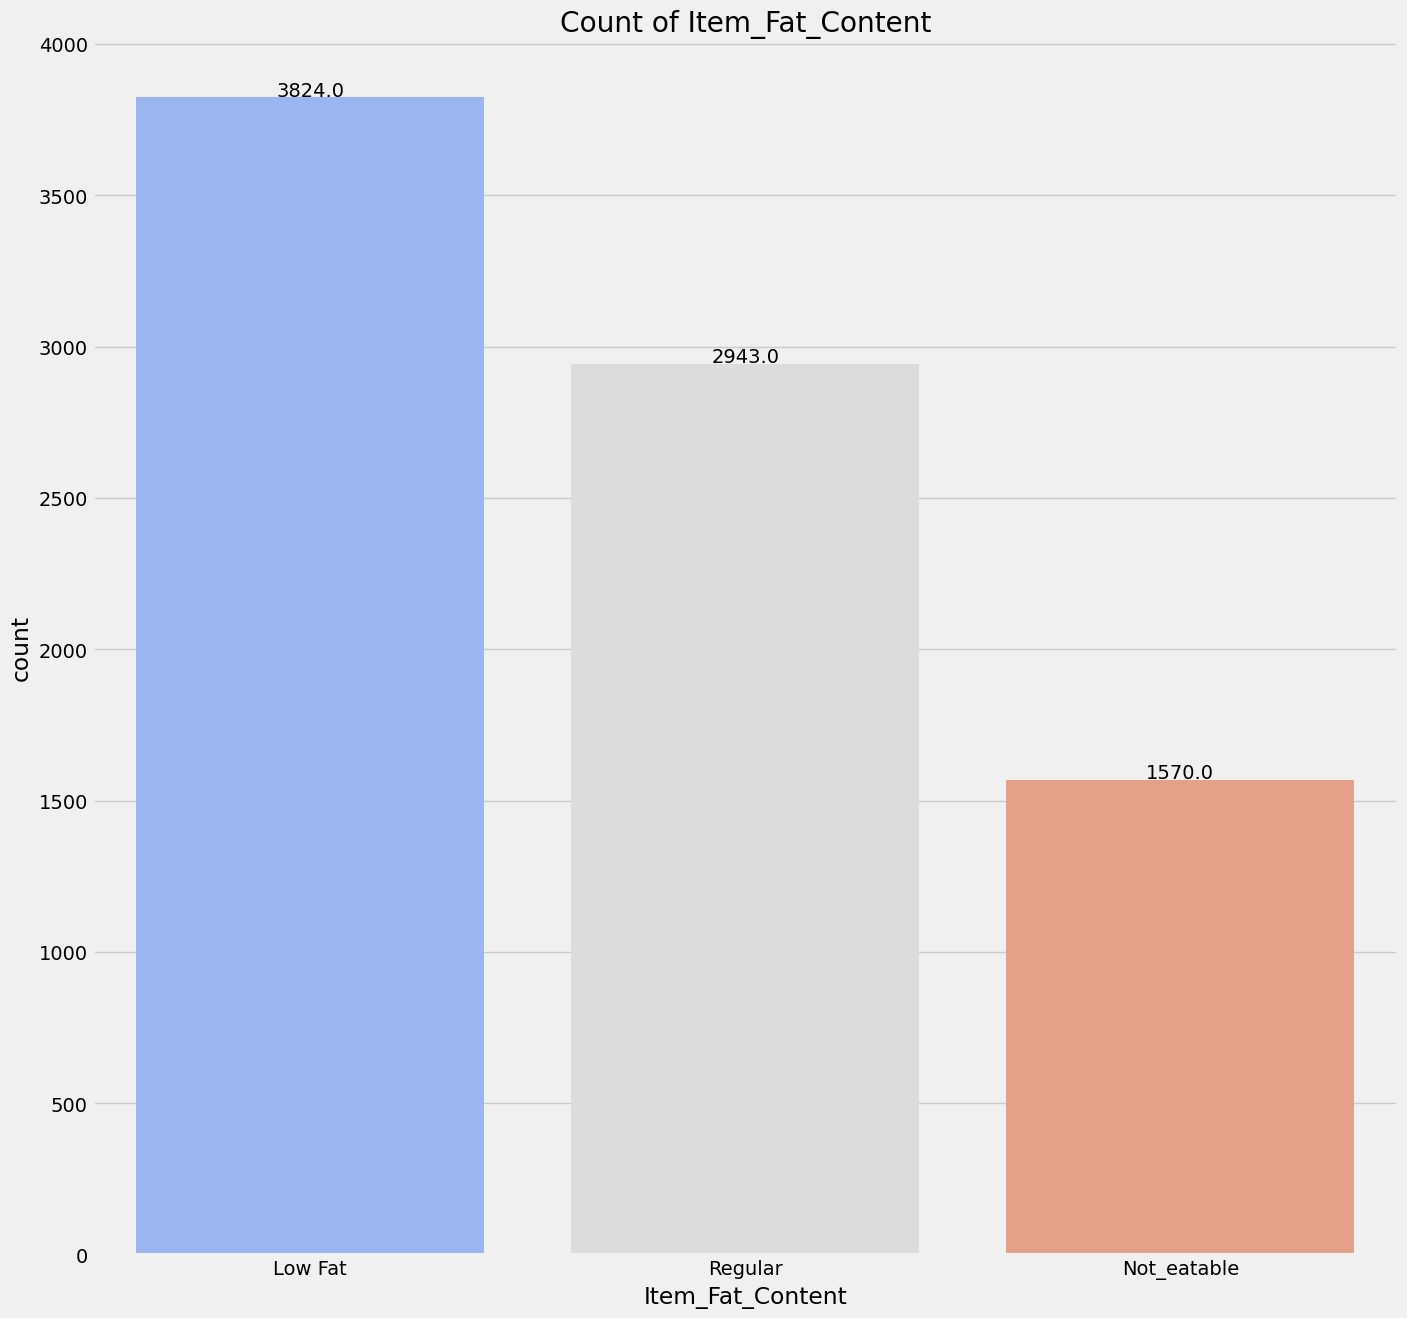

In [56]:
plt.rcParams['figure.figsize'] = 15,15
plt.style.use('fivethirtyeight')
plot = sns.countplot(x = data_n['Item_Fat_Content'],palette='coolwarm')
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0,p.get_height()),
                 ha = 'center',va = 'center',xytext = (0,5),textcoords = 'offset points')
plt.title('Count of Item_Fat_Content')
plt.savefig('Count of Item_Fat_Content.png')
plt.show()

Plotting the Bar Graph with count of `Item_Type`  and confirm that there are no null values and identify all unique values from the `Item_Type`

C:\Users\MARK8\AppData\Local\Temp\ipykernel_16024\3750629583.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x = data_n['Item_Type'], palette='viridis')


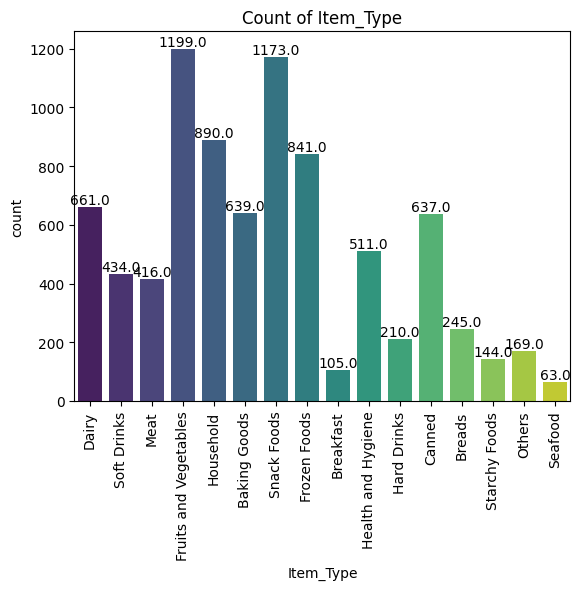

In [50]:
plot = sns.countplot(x = data_n['Item_Type'], palette='viridis')
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0,p.get_height()),
                 ha = 'center',va = 'center',xytext = (0,5),textcoords = 'offset points')
plt.xticks(rotation = 90)
plt.title('Count of Item_Type')
plt.savefig('Count of Item_Type.png')
plt.show()

C:\Users\MARK8\AppData\Local\Temp\ipykernel_16024\3187591240.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x=data_n['Outlet_Establishment_Year'], palette='viridis')  # Try 'viridis', 'coolwarm', etc.


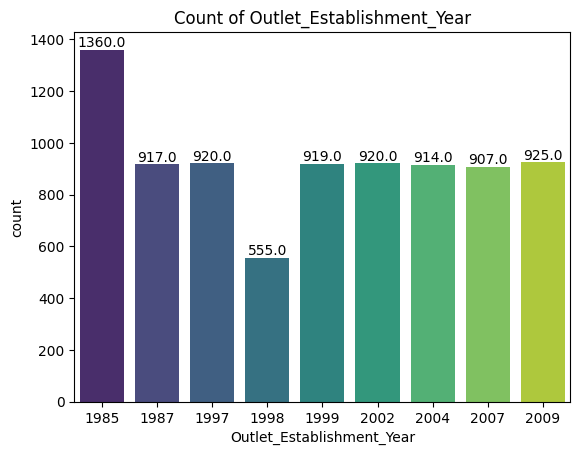

In [51]:
plot = sns.countplot(x=data_n['Outlet_Establishment_Year'], palette='viridis')  # Try 'viridis', 'coolwarm', etc.

for p in plot.patches:
    plot.annotate(
        format(p.get_height(), '.1f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 5),
        textcoords='offset points'
    )

plt.title('Count of Outlet_Establishment_Year')
plt.savefig('Count_of_Outlet_Establishment_Year.png')
plt.show()

C:\Users\MARK8\AppData\Local\Temp\ipykernel_16024\961054118.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x = data_n['Outlet_Location_Type'], palette="viridis")


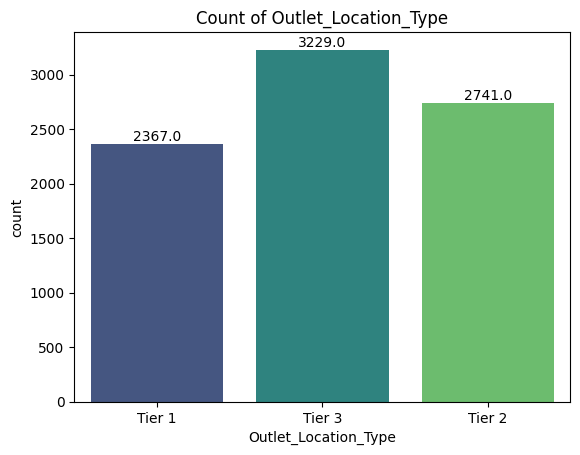

In [52]:
plot = sns.countplot(x = data_n['Outlet_Location_Type'], palette="viridis")
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0,p.get_height()),
                 ha = 'center',va = 'center',xytext = (0,5),textcoords = 'offset points')
plt.title('Count of Outlet_Location_Type')
plt.savefig('Count of Outlet_Location_Type.png')
plt.show()

C:\Users\MARK8\AppData\Local\Temp\ipykernel_16024\1660335259.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x = data_n['Outlet_Size'] , palette="viridis")


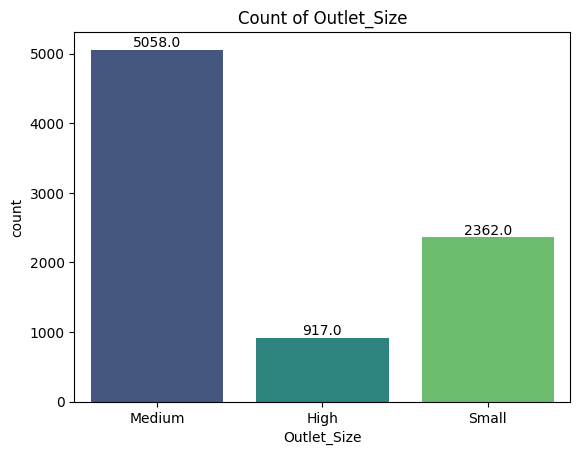

In [53]:
plot = sns.countplot(x = data_n['Outlet_Size'] , palette="viridis")
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0,p.get_height()),
                 ha = 'center',va = 'center',xytext = (0,5),textcoords = 'offset points')
plt.title('Count of Outlet_Size')
plt.savefig('Count of Outlet_Size.png')
plt.show()

C:\Users\MARK8\AppData\Local\Temp\ipykernel_16024\3773802730.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x = data_n['Outlet_Type'] , palette='coolwarm')


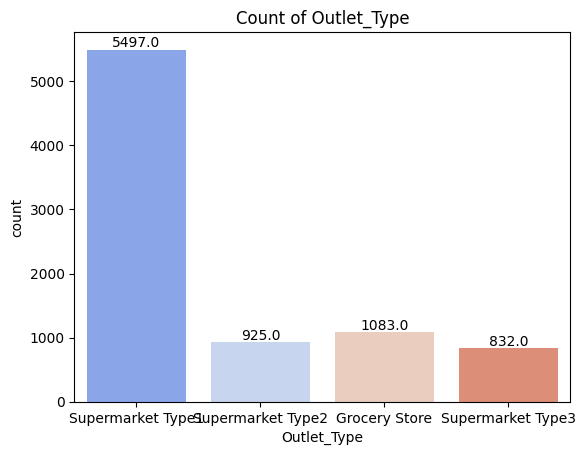

In [54]:
plot = sns.countplot(x = data_n['Outlet_Type'] , palette='coolwarm')
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0,p.get_height()),
                 ha = 'center',va = 'center',xytext = (0,5),textcoords = 'offset points')
plt.title('Count of Outlet_Type')
plt.savefig('Count of Outlet_Type.png')
plt.show()

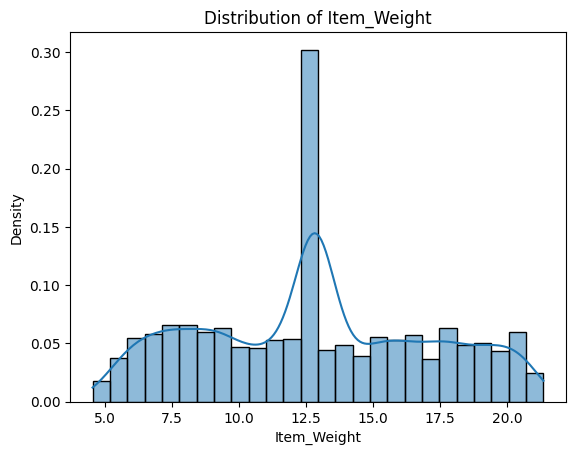

In [55]:
sns.histplot(data_n["Item_Weight"], kde=True, stat="density")
plt.title('Distribution of Item_Weight')
plt.savefig('Distribution_of_Item_Weight.png')
plt.show()

Getting the Correlation Values from all the numeric columns from the dataset using Seaborn Heatmap

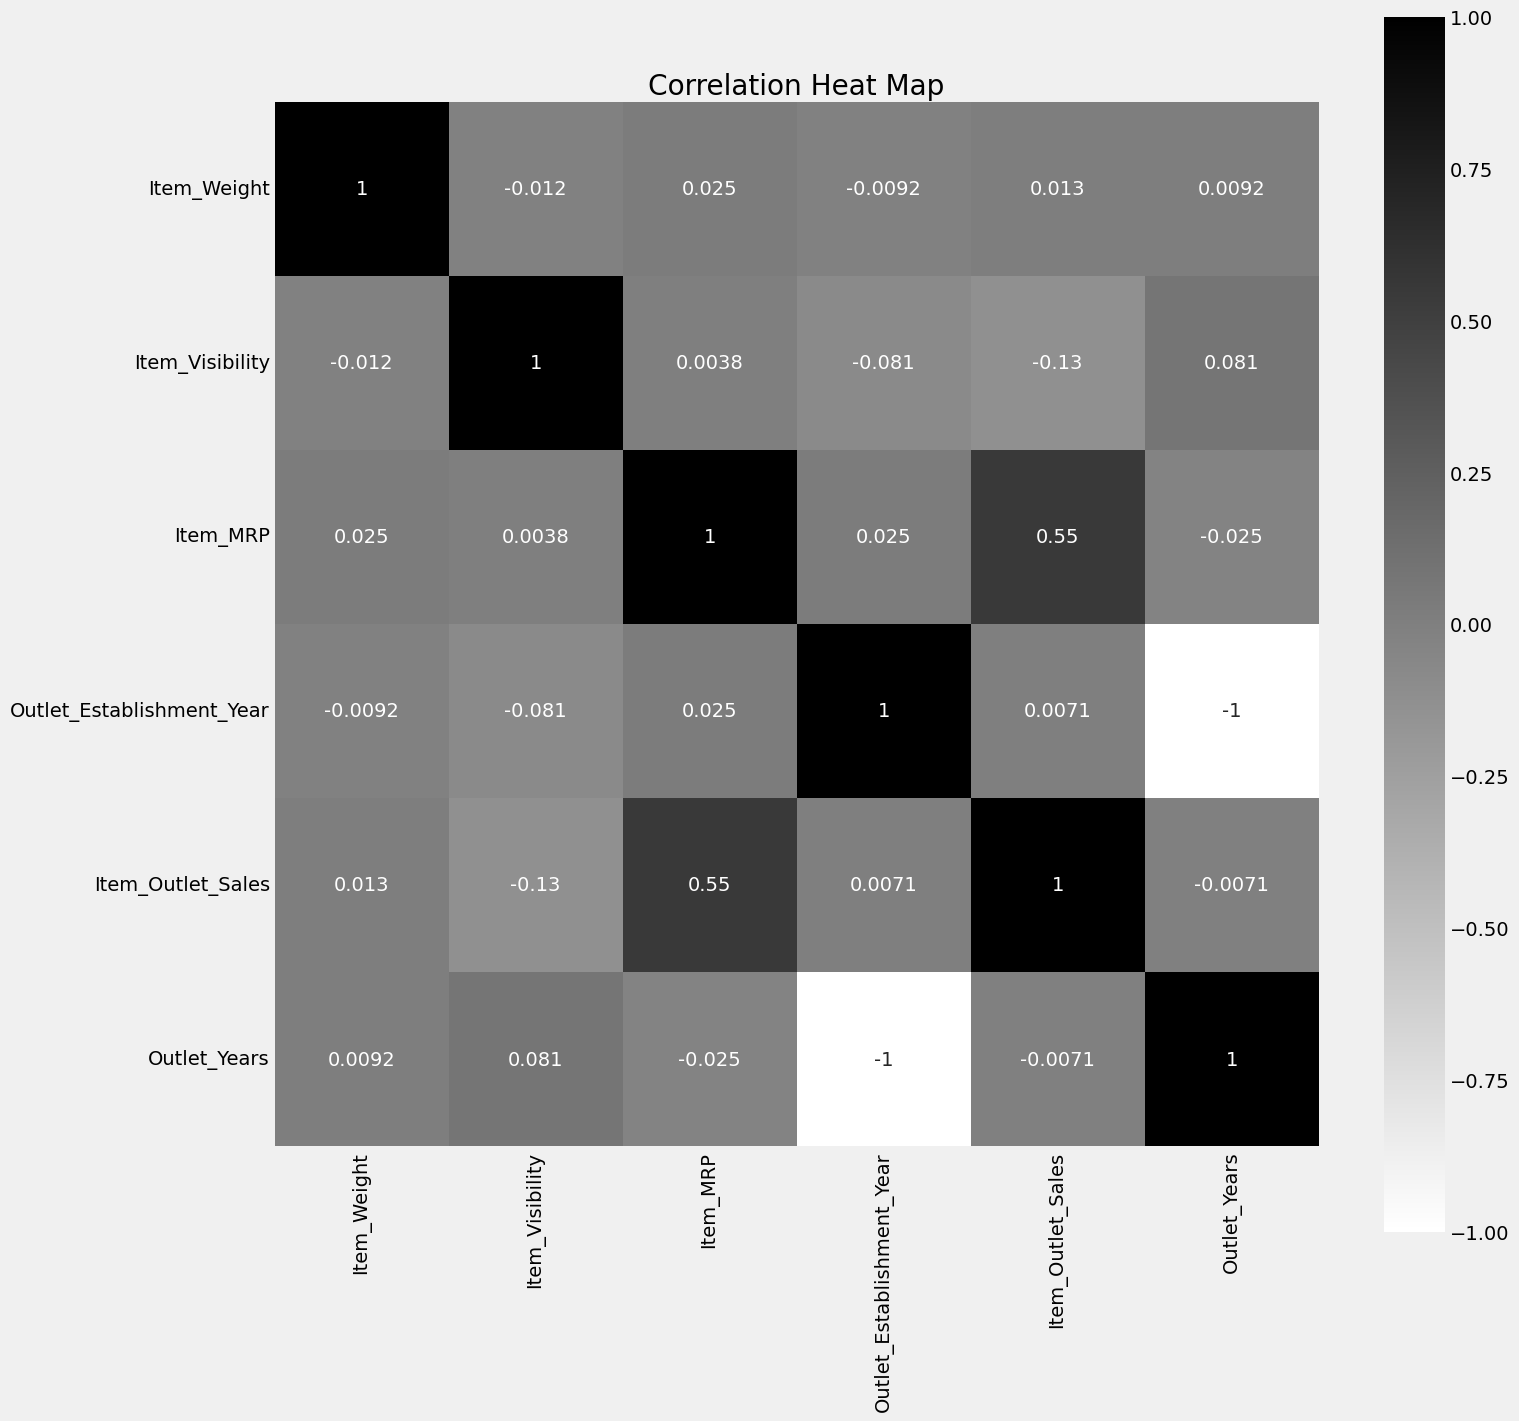

In [57]:
# Drop non-numeric columns
data_cleaned = data_n.select_dtypes(include=[float, int])

# Now create the heatmap
sns.heatmap(data_cleaned.corr(), cmap='binary', cbar=True, annot=True, square=True)
plt.title('Correlation Heat Map')
plt.savefig('Correlation_Heat_Map.png')
plt.show()

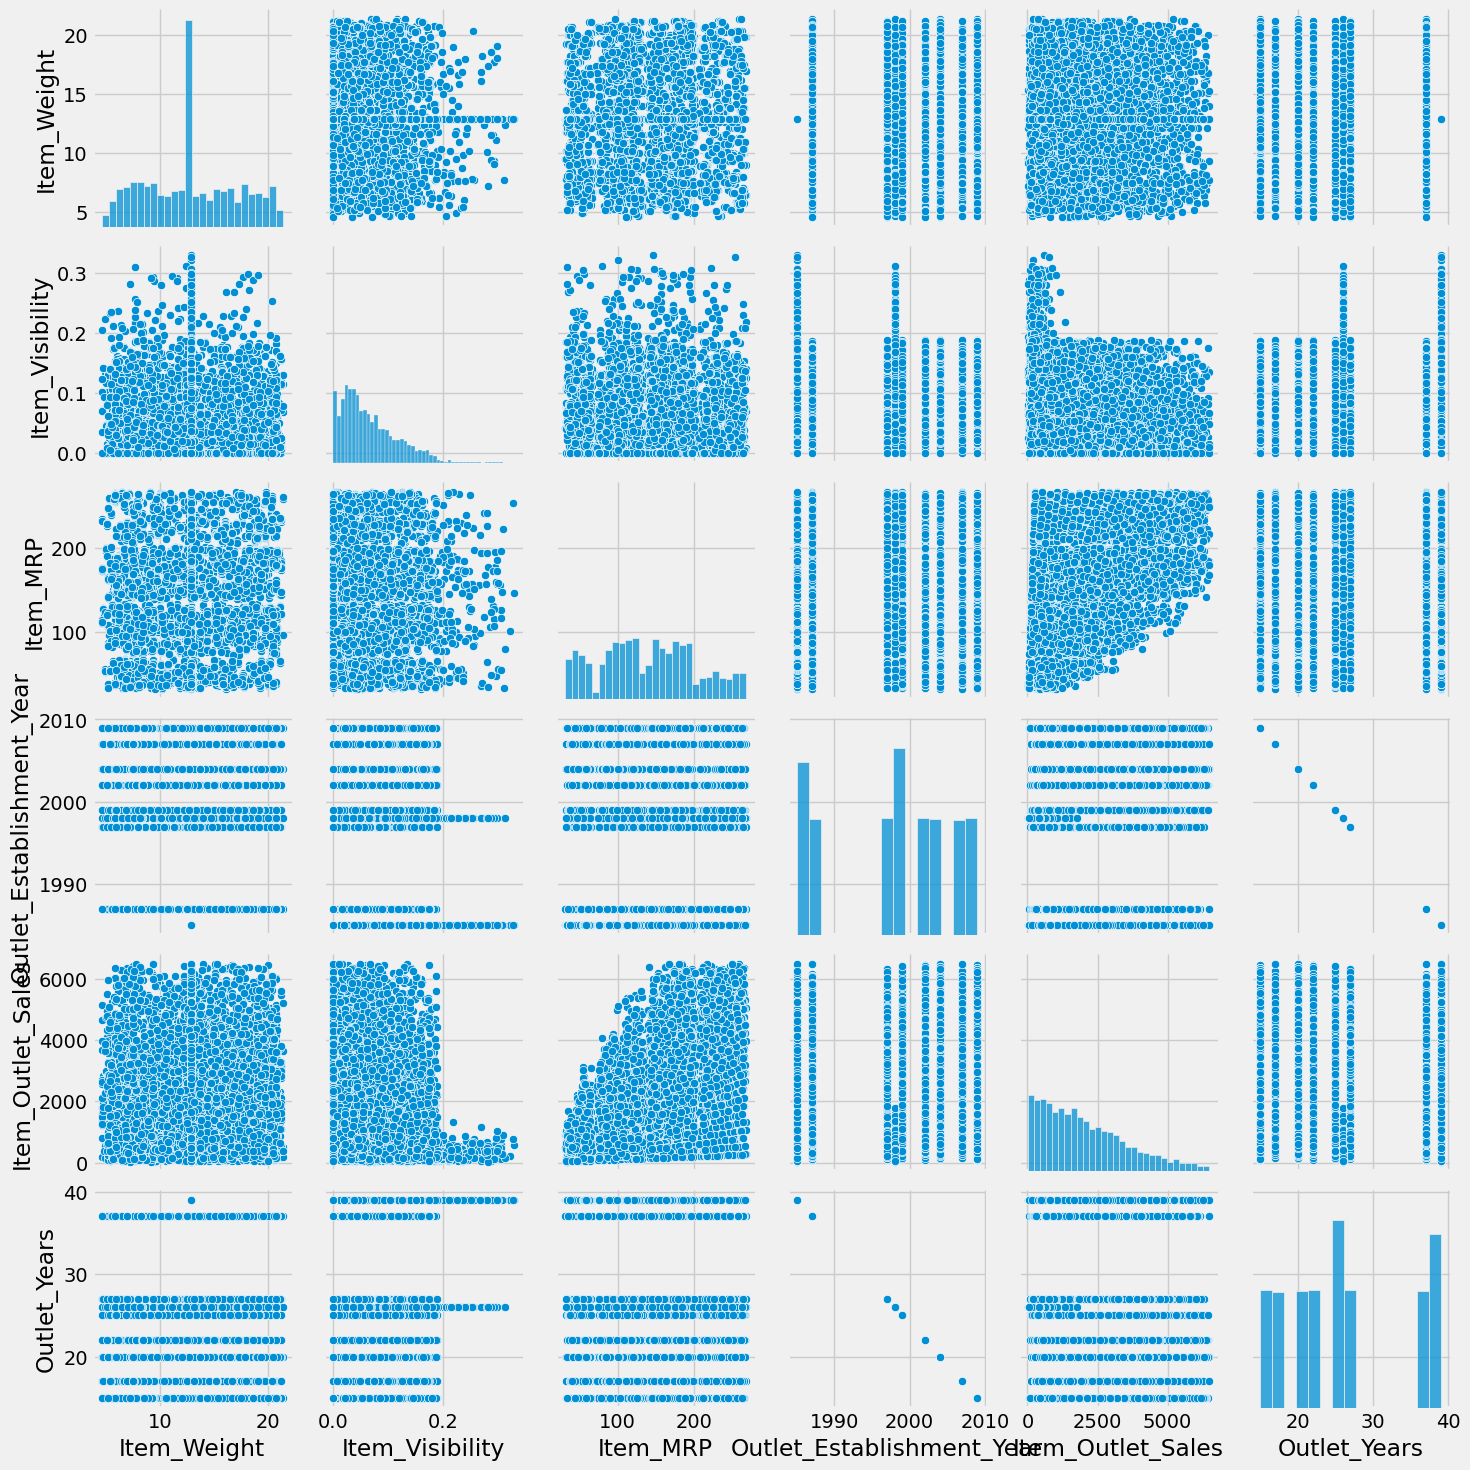

In [58]:
sns.pairplot(data_n)
plt.show()